In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

/home/icb/yufan.xia/tools/apps/mamba/envs/pipeline/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/yufan.xia/tools/apps/mamba/envs/pipeline/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/yufan.xia/tools/apps/mamba/envs/pipeline/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/yufan.xia/tools/apps/mamba/envs/pipeline/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/yufan.xia/tools/apps/mamba/envs/

In [18]:
lipids = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/lipids/merged_results.tsv", sep='\t')
lipids_rand = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/lipids_rand/merged_results.tsv", sep='\t')

merged_df = pd.concat([lipids, lipids_rand], ignore_index=True)

In [19]:
merged_df.head()

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.554643,0.435045,-2.621599,0.837399,0.706831,lipids,ridge,hvg,{'alpha': 1.0},a51cb27a8c
1,0.658927,0.516056,-4.107768,0.788696,0.656811,lipids,ridge,hvg,{'alpha': 0.1},ee5c68a518
2,0.327100,0.253298,-0.243606,0.935647,0.842883,lipids,ridge,hvg,{'alpha': 100.0},9057959eb0
3,0.680768,0.532901,-4.451549,0.778568,0.647076,lipids,ridge,hvg,{'alpha': 0.01},edeb306418
4,0.310650,0.239663,-0.120231,0.941771,0.855097,lipids,ridge,hvg,{'alpha': 200.0},0ad5fbe868


Best performers as table: 

In [20]:
df = merged_df.copy()

In [21]:
import pandas as pd
import ast

# --- CONFIGURATION ---
metrics = ['r2', 'mae', 'rmse', 'pearson', 'spearman']
best_direction = {
    'r2': 'max',
    'mae': 'min',
    'rmse': 'min',
    'pearson': 'max',
    'spearman': 'max'
}

# --- INPUT ---
# Replace this with your actual TSV loading
# df = pd.read_csv("results.tsv", sep="\t")
# Convert method_params from string to dict
df['method_params'] = df['method_params'].apply(ast.literal_eval)

# --- COMPUTE BEST PERFORMERS ---
results = []

for task in df['task'].unique():
    task_df = df[df['task'] == task]
    for metric in metrics:
        direction = best_direction[metric]
        top_rows = []
        for model in task_df['method_name'].unique():
            model_df = task_df[task_df['method_name'] == model]
            if model_df.empty:
                continue
            if direction == 'max':
                best_row = model_df.loc[model_df[metric].idxmax()]
            else:
                best_row = model_df.loc[model_df[metric].idxmin()]
            top_rows.append(best_row)
        best_df = pd.DataFrame(top_rows)
        best_df['best_metric'] = metric
        results.append(best_df)

# --- FINAL RESULT ---
best_models_all = pd.concat(results, ignore_index=True)

# Optional: display or export
# best_models_all.to_csv("best_models_per_task_metric.tsv", sep="\t", index=False)


In [22]:
best_models_all

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash,best_metric
0,0.298539,0.231851,-0.013077,0.945285,0.870450,lipids,ridge,hvg_svd,{'alpha': 200.0},c472a4ec65,r2
1,0.281070,0.216598,0.087893,0.952234,0.880561,lipids,lasso,hvg,{'alpha': 0.01},69b87cb832,r2
2,0.298858,0.232056,-0.014993,0.945155,0.870202,lipids,linear,hvg_svd,{'parm': 0},00e89f1489,r2
3,0.280817,0.216486,0.088965,0.952364,0.880699,lipids,elastic_net,hvg,"{'alpha': 0.1, 'l1_ratio': 0.1}",5063adb108,r2
4,0.281030,0.216928,0.082626,0.952393,0.880304,lipids,xgboost,hvg,"{'alpha': 10, 'lambda': 50, 'max_depth': 5, 'l...",c7b850df11,r2
...,...,...,...,...,...,...,...,...,...,...,...
65,0.221081,0.171802,0.055241,0.965106,0.901030,lipids_rand,linear,svd_graph,{'parm': 0},841e9a5b04,spearman
66,0.220036,0.171431,0.063615,0.965464,0.902090,lipids_rand,elastic_net,svd_graph,"{'alpha': 0.01, 'l1_ratio': 0.5}",f3ea497fd3,spearman
67,0.213947,0.166661,0.100063,0.967857,0.905598,lipids_rand,xgboost,svd_graph,"{'alpha': 5, 'lambda': 30, 'max_depth': 6, 'le...",473ce98b69,spearman
68,0.235512,0.172232,0.041967,0.964962,0.901370,lipids_rand,cvae,svd_graph,"{'hidden_dim': 256, 'latent_dim': 40, 'lr': 0....",b98fa57c33,spearman


In [32]:
df = merged_df.copy()
df = df[df["featsel"] == "hvg"]

In [33]:
import pandas as pd
import ast

# --- INPUT ---
# df = pd.read_csv("your_file.tsv", sep="\t")
df['method_params'] = df['method_params'].apply(ast.literal_eval)

# --- BEST RMSE PER TASK ---
best_rmse_models = []

for task in df['task'].unique():
    task_df = df[df['task'] == task]
    best_row = task_df.loc[task_df['rmse'].idxmin()]
    best_rmse_models.append(best_row)

# Combine into a single DataFrame
best_rmse_df = pd.DataFrame(best_rmse_models)
best_rmse_df
# Optional: export or display
# best_rmse_df.to_csv("best_rmse_per_task.tsv", sep="\t", index=False)


,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
86,0.280817,0.216486,0.088965,0.952364,0.880699,lipids,elastic_net,hvg,"{'alpha': 0.1, 'l1_ratio': 0.1}",5063adb108
473,0.274442,0.208617,0.131460,0.955295,0.885294,lipids_rand,xgboost,hvg,"{'alpha': 5, 'lambda': 30, 'max_depth': 6, 'le...",908adaa3f1


In [8]:
def plot_fs_heatmap_metrics(results_df, model_name='xgboost'):
    """
    For a given model, plot 3 heatmaps (Pearson, RMSE, R²) showing best performance per feature selection and task.
    """
    metrics = ['pearson', 'rmse', 'r2']
    
    # Filter to only one model
    df = results_df[results_df['method_name'] == model_name]

    for metric in metrics:
        # Get best performance for each (task, featsel)
        best_scores = (
            df.groupby(['task', 'featsel'])[metric]
            .max()  # You could also use .mean() if preferred
            .reset_index()
        )

        # Pivot for heatmap
        pivot = best_scores.pivot(index='featsel', columns='task', values=metric)

        # Plot
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot, annot=True, cmap='viridis', fmt=".3f")
        plt.title(f'Best {metric.upper()} per Feature Selection — Model: {model_name}')
        plt.xlabel("Task (Dataset + Split)")
        plt.ylabel("Feature Selection")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


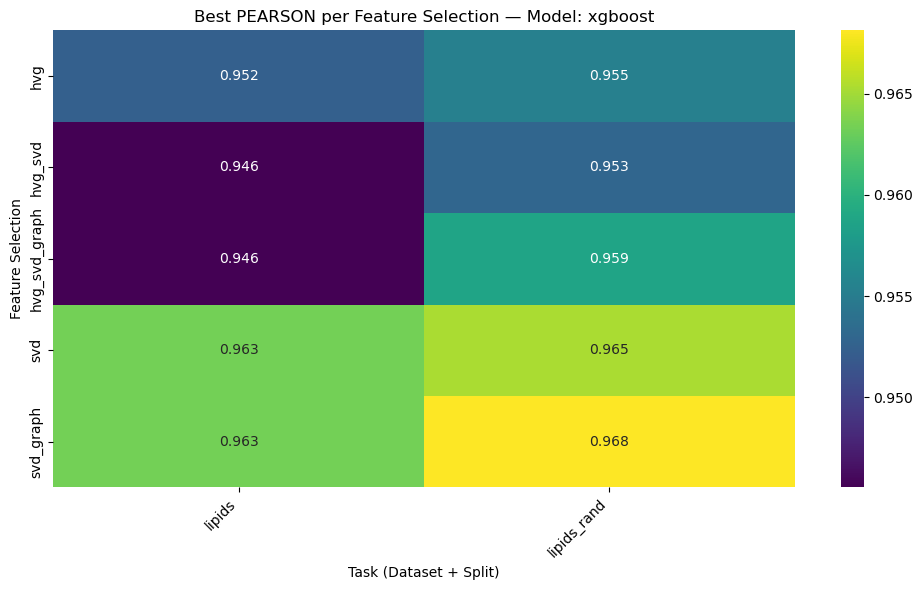

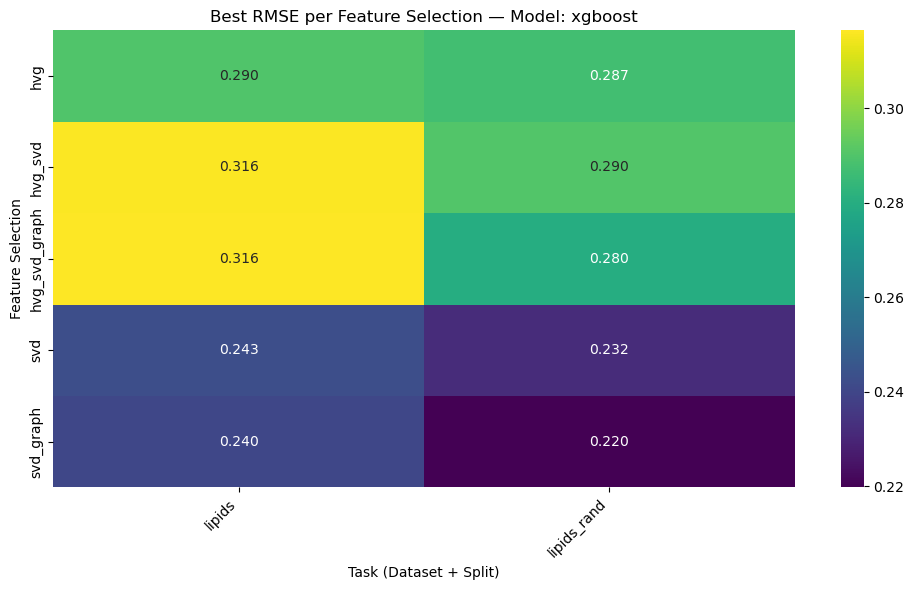

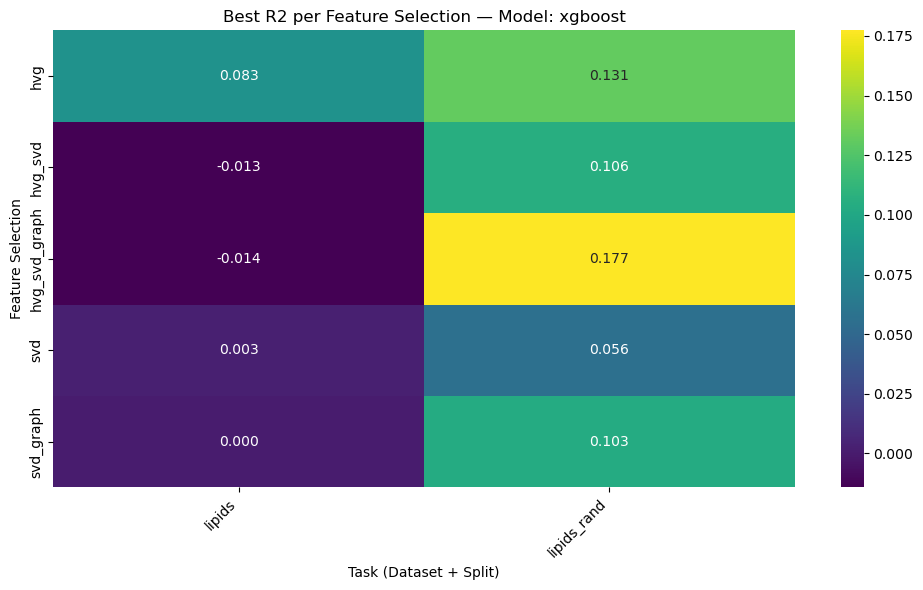

In [9]:
plot_fs_heatmap_metrics(merged_df)